# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 1

**Правила:**

* Выполненную работу нужно отправить телеграм-боту, адрес которого будет указан на странице курса до конца недели. Обращаем ваше внимание, что в боте необходимо заранее зарегистрироваться и дождаться подтверждения.
* Дедлайн **20 февраля в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины с подтверждающими документами.
* Прислать нужно ноутбук в формате `ipynb` 
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.

-----

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

%matplotlib inline

Для выполнения задания вы можете установить свою палитру цветов при отрисовке графиков с помощью кода ниже. Если введете несуществующее имя, то вам напечатается список возможных палитр. Также вы можете устанавливать свои цвета конкретным объектам на графиках, обычно это делается с помощью аргумента `color`.

In [2]:
sns.set_palette('Set2')

### Задача 1

Для выполнения задания выберите любой профиль, в течении 1-2 недель его можно поменять. Студенты кафедры инновационная педагогика выполняют задание по профилю педагогика.

**Профиль биология**

Скачайте <a href="https://www.kaggle.com/ruslankl/mice-protein-expression
">датасет</a> с данными об экспрессии белков у белых мышей. Данный датасет состоит из таблицы значений уровней экспрессии 77 различных белков в мозге у мышей. Каждая строка соответствует одной особи, каждый столбец соответствует одному белку. На столбцы Genotype, Treatment и подобные пока не обращаем внимания. 

Для исследования рекомендуется выбрать столбцы 'ITSN1_N', 'DYRK1A_N', 'pBRAF_N', 'pCREB_N', но можно взять и другие.

**Профиль физика**

Скачайте <a href="https://www.kaggle.com/fedesoriano/cern-electron-collision-data
">датасет</a> с данными о столкновении электронов на Большом Адронном Коллайдере. 

Данный датасет  содержит информацию о событиях столкновения двух электронов. Он состоит из таблицы различных параметров столкновений. Каждая строка соответствует одному столкновению, каждый столбец соответствует одному параметру. Например, в столбцах E1, E2 записаны значения энергии сталкивающихся электронов, в столбцах px1, py1, pz1, px2, py2, pz2 — значения моментов импульса, в столбцах Q1, Q2 $-$ заряды электронов.

Для исследования рекомендуется выбрать столбцы 'E2', 'px2', 'eta2', 'phi2'. Все эти столбцы — некоторые параметры второго электрона. Можно взять и другие столбцы.

**Профиль педагогика**

Скачайте <a href="https://www.kaggle.com/spscientist/students-performance-in-exams
">датасет</a> с данными о результатах учащихся на экзаменах.

Данный датасет состоит из таблицы баллов учащихся на экзаменах по математике, чтению и письму, а также дополнительной информации о студентах. Каждая строка соответствует одному учащемуся, каждый столбец соответствует одному признаку. В столбцах math score, reading score и writing score записаны баллы за экзамены.

Для исследования возьмите столбцы 'math score', 'reading score', 'writing score'.

----

Чтобы скачать данные, зарегистрируйтесь на сайте, после нажмите download на странице датасета и распакуйте скачанный архив. Вы получите файл формата `csv`.

Если вы работаете в Google Colab, можно загрузить полученный файл в разделе "Файлы" (значок папки) на левой панели.

In [3]:

df = pd.read_csv("./Data_Cortex_Nuclear.csv")


Посмотрим на первые строки этой таблицы.

In [4]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


Выберите несколько (3-6) столбцов для анализа значений в них.

In [8]:
# укажите столбцы данных 
# Пример: columns = ['math score', ...]
columns = ['ITSN1_N', 'DYRK1A_N', 'pBRAF_N', 'pCREB_N']

df_chosen_columns = df[columns]

#Одномерный массив значений одного признака (например, 'math score') можно получить так:
#df_chosen_columns['math score']

#### Гистограммы

Для каждого из выбранных признаков нарисуйте гистограмму распределения. Для этого воспользуйтесь функцией `matplotlib.pyplot.hist`.

*Примечание.* В анализе данных обычно используется слово "признак" для обозначения исследуемого свойства объекта. Например, для биологического датасета признаком является белок.


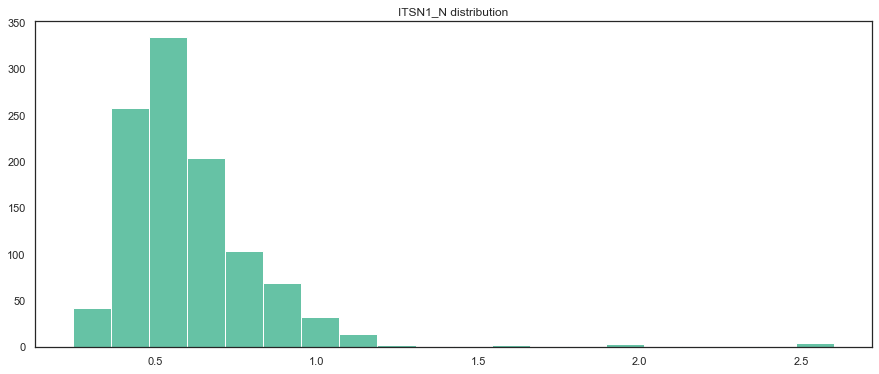

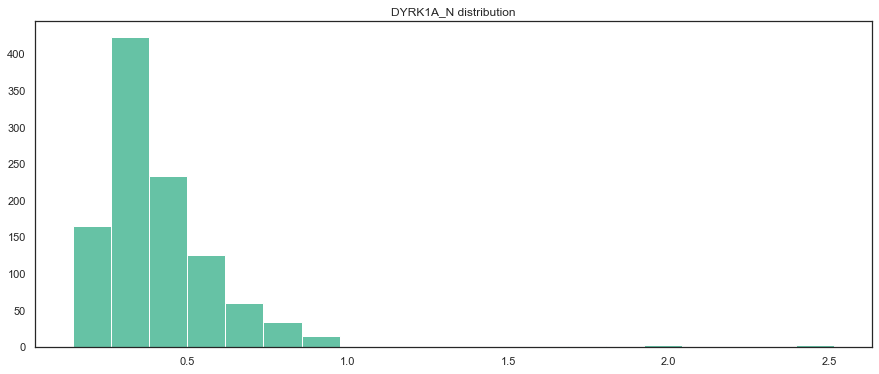

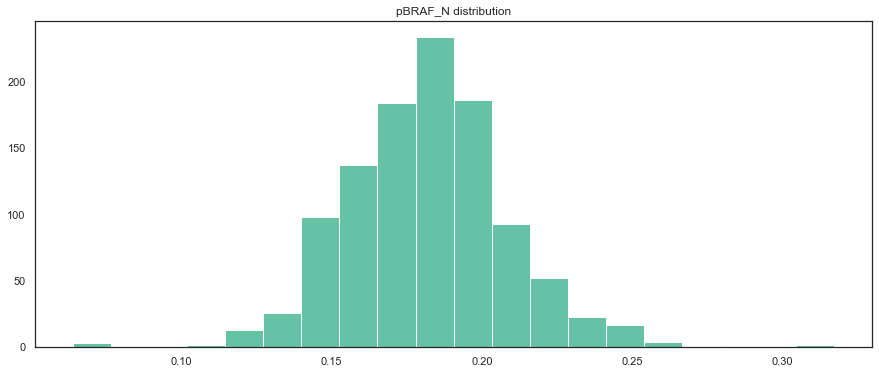

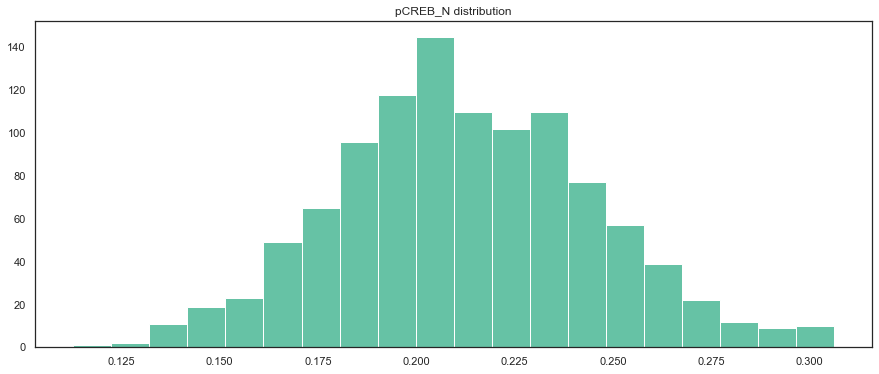

In [9]:
for i, column in enumerate(columns):
    plt.figure(figsize=(15, 6))
    
    plt.hist(df_chosen_columns[column], bins=20)
    plt.title(column + ' distribution');

Выбросы — значения, которые сильно отличаются от большинства значений выборки. Они могут возникать из-за ошибки измерения, из-за необычной природы входных данных, но также могут быть и частью распределения.

По гистограммам предположите, в каких из исследуемых признаков могут быть выбросы?

**Ответ:** вообще выбросы могут быть в любых исследованиях, но здесь конкретно гистограмму сильно портят выборсы для первого и второго белков

Выбросы могут сильно портить внешний вид графика.

Продемонстрируем это на примере. Сгенерируем выборку размера 1000 из стандартного нормального распределения и построим по ней гистограмму. В библиотеке `scipy` это можно сделать с помощью метода `rvs`

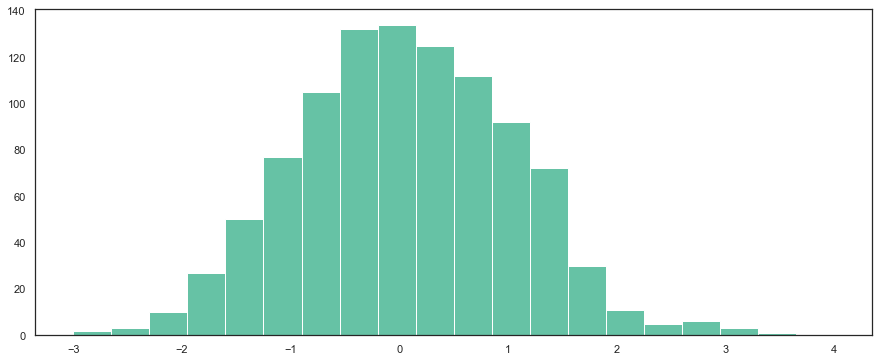

In [10]:
sample = sps.norm.rvs(size=1000)

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Как видим, большая часть значений находятся в промежутке от -3 до 3.

Теперь добавим выброс — очень большое значение, которое могло появиться, например, в результате ошибок измерения. Допустим, что выброс — первое измерение.

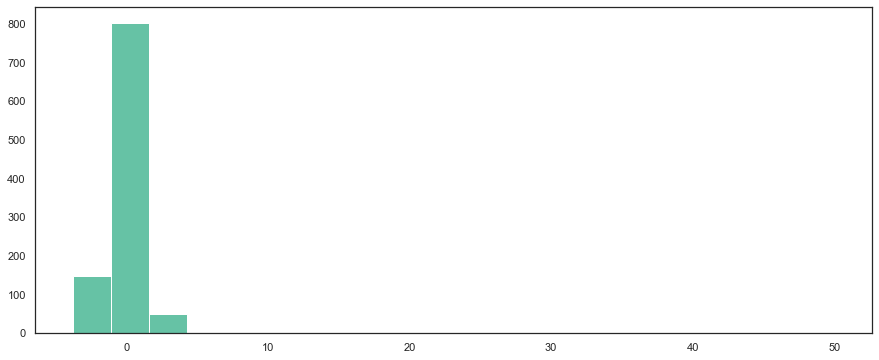

In [11]:
outlier = 50
sample[0] = outlier

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20);

По такому графику уже нельзя сделать предположение о распределении выборки.
Также обратите внимание, что большая часть графика пустая, что говорит о неинформативности данного графика.

Эту проблему с графиками можно решить с помощью параметра `range`, который определяет, в каких границах строится гистограмма.

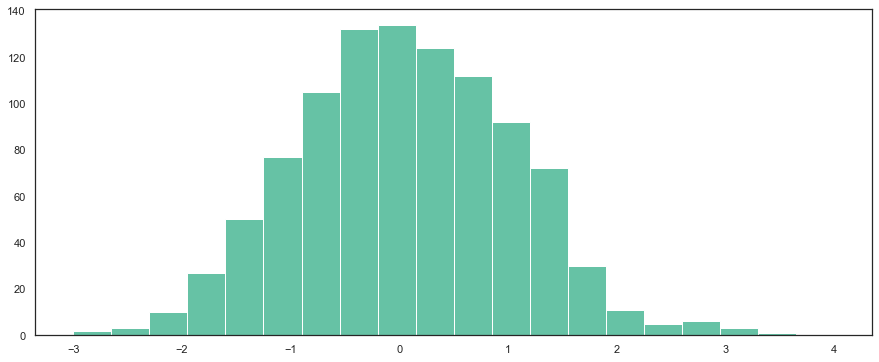

In [12]:
plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Проделайте то же самое с теми столбцам, в которых, как вы считаете, есть выбросы.

В словаре `ranges_without_outliers` укажите, в каких пределах, по вашему мнению, стоит нарисовать гистограмму распределения для каждого признака.

Пример заполнения словаря на ячейке ниже. 

Здесь мы считаем, что для признака `column1` большая часть значений находится в промежутке от -1 до 5, а все значения за пределами этого промежутка — выбросы.
Мы хотим нарисовать информативный график для гистограммы значений признака `column1`, поэтому гистограмму будем строить только на основе значений из промежутка (-1, 5)

Аналогично для признака `column2`

In [ ]:
ranges_without_outliers_example = {
    'column1' : (-1, 5),
    'column2' : (0, 3)
}

Аналогично определите интервалы для исследуемых признаков

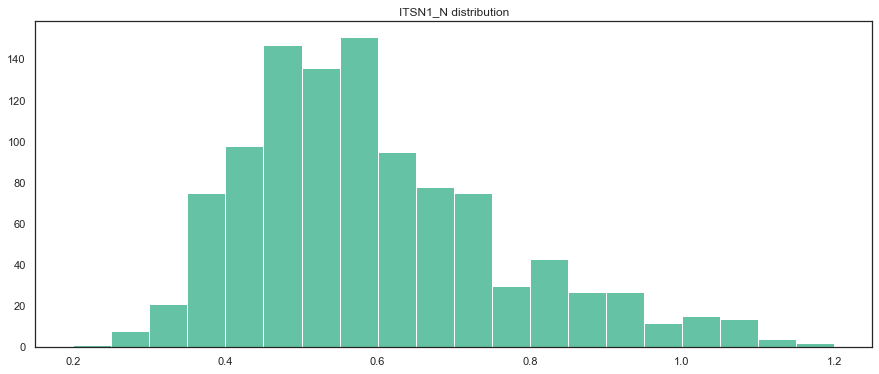

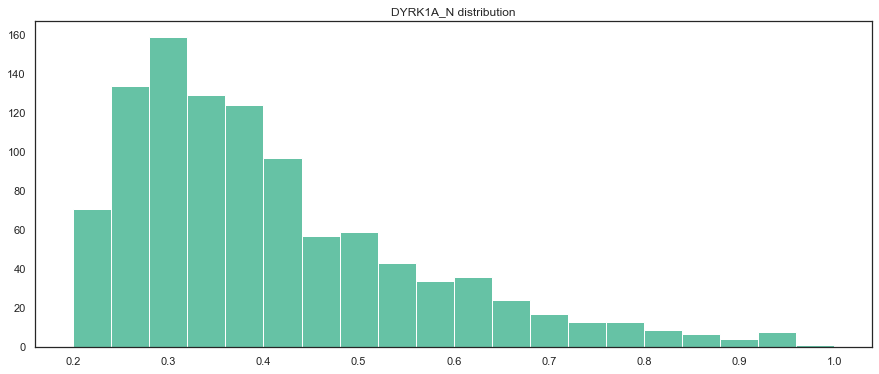

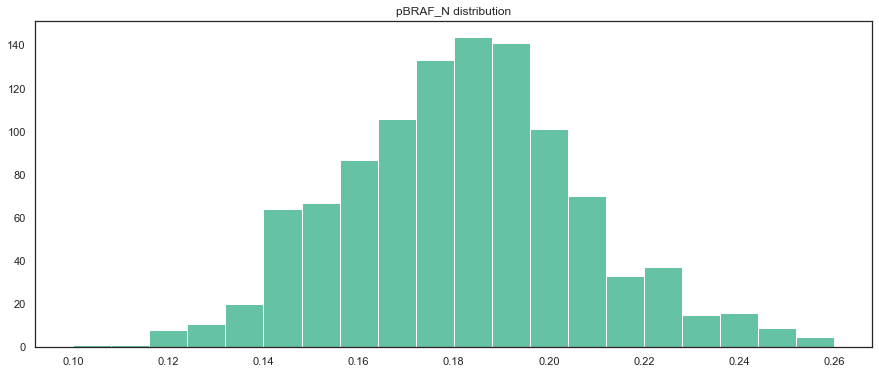

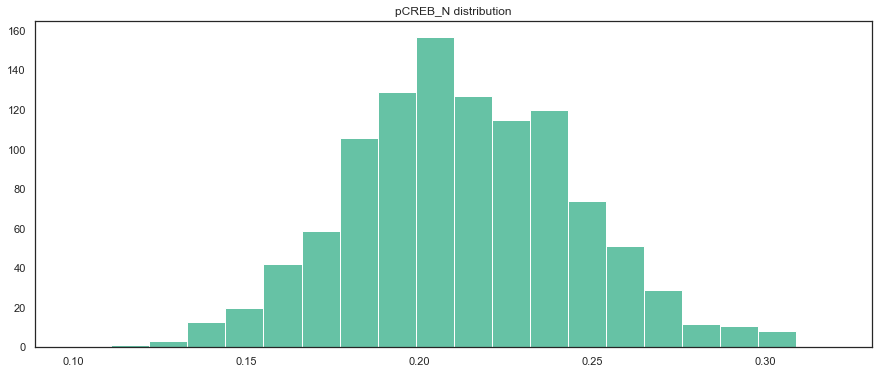

In [43]:
ranges_without_outliers = {'ITSN1_N':(0.2,1.2)
                           , 'DYRK1A_N':(0.2,1),
                           'pBRAF_N':(0.1,0.26),
                           'pCREB_N':(0.1,0.32)
}


for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    plt.hist(df_chosen_columns[column], range=column_range, bins=20)
    plt.title(column + ' distribution')

**Сделайте выводы** 

Изменилась ли форма распределений, стали ли графики информативнее?



**Ответ:**
Формы гистограмм значительно изменились, что сделало их много более информативными. Можно сделать вывод о том, что использовать экспериментальные данные для построения модели(/гистограммы) необходимо "осторожно", предварительно избавивишись от выбросов(иногда избавляться не стоит-об этом далее)



#### Ядерные оценки плотности

Иногда гистограммы недостаточно, чтобы понять, какое у распределение у элементов выборки. В таких случаях можно использовать ядерные оценки плотности. 

В библиотеке `seaborn` они представлены функциями `distplot` (в версиях до `0.11.1`), `kdeplot` (начиная с версии `0.11.1`)

In [20]:
sns.__version__

'0.9.0'

Пример для нормального распределения с выбросом.

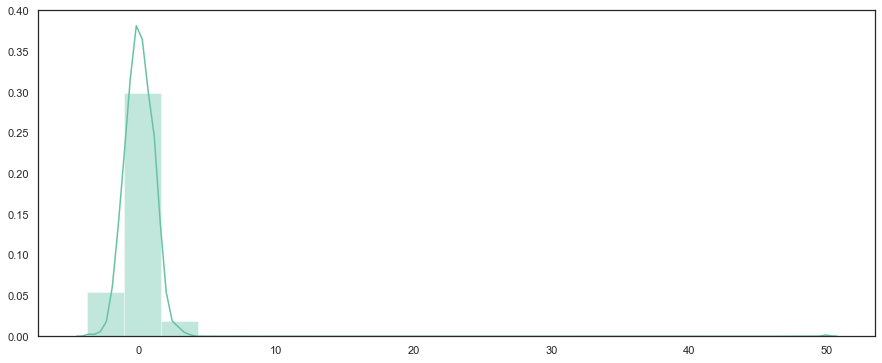

In [21]:
plt.figure(figsize=(15, 6))
sns.distplot(sample, bins=20);

Видно, что, даже несмотря на "хвост", плотность основной части данных довольно похожа на плотность нормального распределения. Теперь нарисуем этот же график для выборки без выброса.

Для наглядности на этом же графике нарисуем плотность стандартного нормального распределения. В библиотеке `scipy` плотность распределения называется `pdf`.

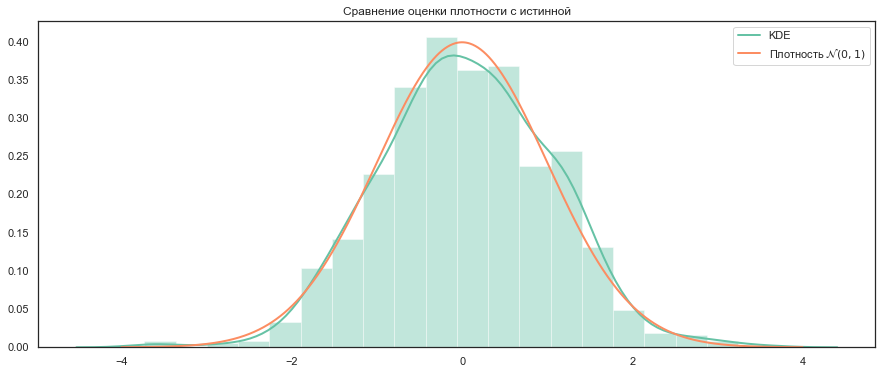

In [22]:
# уберем выброс
sample_wo_ourliers = sample[1:]

# сетка от -4 до 4 из 1000 значений
grid = np.linspace(-4, 4, 1000)
# считаем значения функции в выборке
norm_pdf_values = sps.norm.pdf(grid)

# отрисовка графика
plt.figure(figsize=(15, 6))
sns.distplot(sample_wo_ourliers, bins=20, kde_kws={"label": "KDE", "linewidth": 2})
plt.plot(grid, norm_pdf_values, label='Плотность $\\mathcal{N}(0,1)$', lw=2)
plt.title('Сравнение оценки плотности с истинной')
plt.legend();

Однако ядерные оценки плотности тоже не универсальны.
Рассмотрим пример экспоненциального распределения.

Сгенерируйте выборку размера 100 из экспоненциального распределения $\textit{Exp(1)}$. Для этого воспользуйтесь функцией `sps.expon.rvs`.

In [23]:
sample1 = sps.expon.rvs(size=100)

Посчитайте значения плотности этого распределения на промежутке от 0 до 6.

In [169]:

grid = np.linspace(0, 6, 100)
#  как убрать -1
expon_pdf_values = sps.expon.pdf(grid)

Нарисуйте гистограмму и ядерную оценку плотности для выборки из сгененированного экспоненциального распределения.

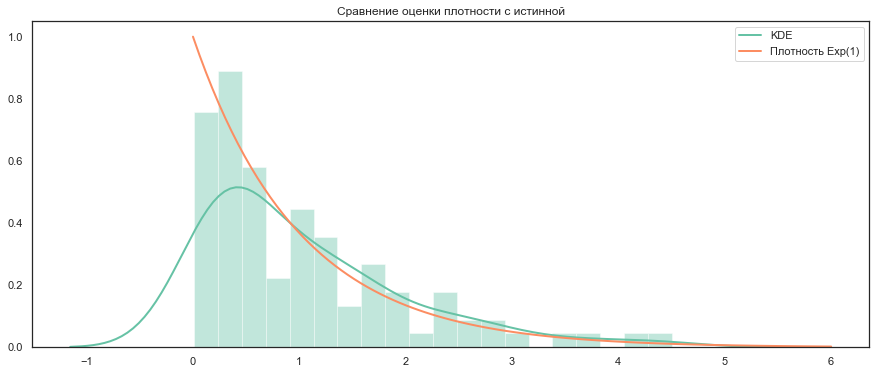

In [170]:

# отрисовка графика
plt.figure(figsize=(15, 6))
sns.distplot(sample1, bins=20,kde_kws={"label": "KDE", "linewidth": 2})
plt.plot(grid, expon_pdf_values, label='Плотность Exp(1)', lw=2)
plt.title('Сравнение оценки плотности с истинной')
plt.legend();

Как вы думаете, почему ядерная оценка плотности так плохо приближает реальную плотность распределения?

**Ответ:** ядерная оценка плотности-непрерывная функция(насколько я понял из лекции). Из-за этого она плохо оценивает распределения по типу экспоненциального(обрыв в нуле). Другими словами, при построении ядра в нуле захватываются отрицательные значения, которых вообще и быть не может в выборке. По той же причине около нуля оценка недостаточно велика(как хотелось бы), тк значения около 0 складываются только "правыми колокоолами"

Нарисуйте гистограммы и ядерные оценки плотности для исследуемых признаков

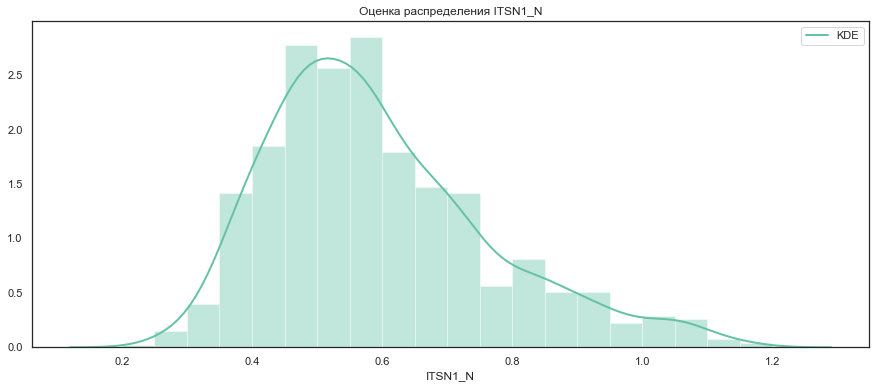

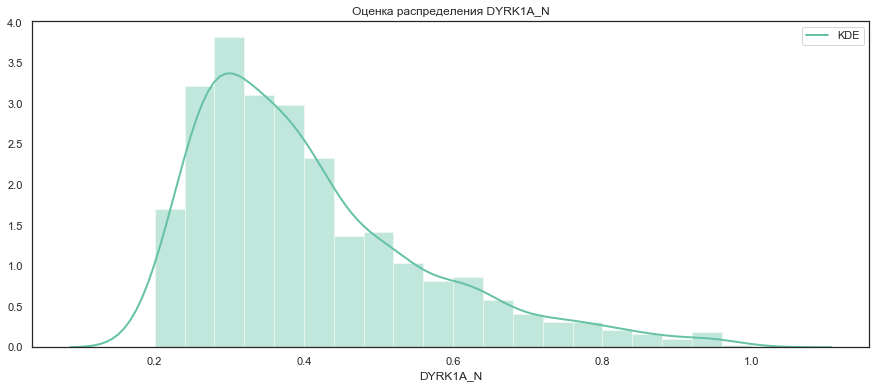

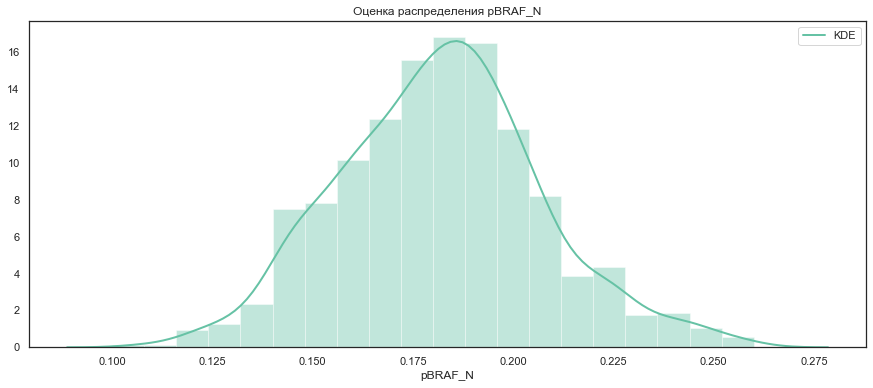

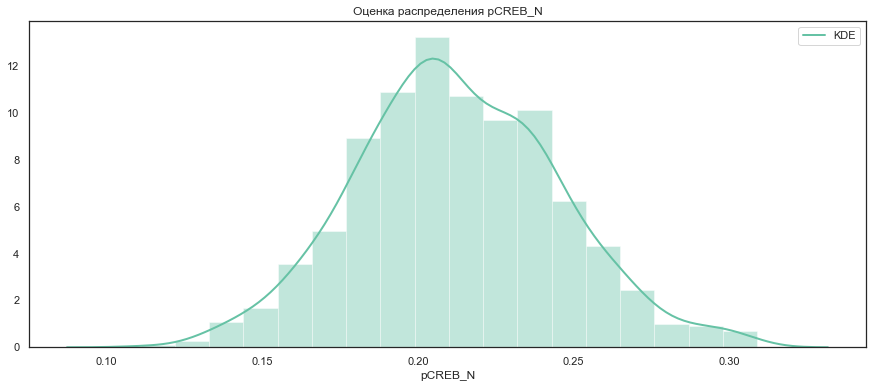

In [45]:
for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    sns.distplot(df_chosen_columns[column], bins=20, hist_kws={"range": column_range}, kde_kws={"clip": column_range, "label": "KDE", "linewidth": 2})
    plt.title('Оценка распределения ' + column)

**Сделайте выводы.** Какой из двух видов графиков более нагляден для данных выборки? Какими свойствами должно обладать распределение признака, чтобы ядерная оценка плотности, полученная по выборке, была похожа на настоящую плотность? 

**Вывод:**
Для предоставленных данных ядерная оценка плотности и гистограмма довольно хорошо отражают распределние белков, в силу того, что данных много+были отброшены "выбросы"
Ядерная оценка плотности работает, тк область значений признака совпадает с областью, на которой строится kde, более того, кажется, что признак распределен непрерывно, что также благоприятно сказывается на оценках методом kde

Здесь мы "избавились" от выбросов для того, чтобы понять, как распределена бОльшая часть выборки.

Но нужно понимать, что избавляться от выбросов при анализе данных стоит не всегда.
Прежде, чем удалять выбросы из выборки, хорошо бы понимать:
1. **Какая цель исследования**. Например, если мы хотим узнать, как хорошо "средний" студент МФТИ решает задачи по теории вероятностей, результаты лучших студентов на потоке не сильно проясняют ситуацию и затрудняют анализ. Такие результаты нужно выкинуть. Если же надо отобрать студентов на стажировку для аналитиков данных, хорошие результаты не только не нужно отсеивать, но и нужно анализировать дополнительно.
2. **Почему** отличающееся значение могло появиться в выборке. Это случайность / ошибка в измерениях / следствие какого-то еще фактора? Возможно, удаление отличающегося элемента лишит нас важных знаний о природе исследуемых данных.



**Приведите примеры исследований**, в которых нужно/не нужно удалять выбросы в данных:

нужно удалять: оцениваем сколкьо тепла выделяется от какого-то электронного устройства в среднем

не нужно удалять: оцениваем сколько в среднем тепла выделяется от вулкана(какая-то ограниченная территория на карте), выбросы здесь как раз наиболее интересны(хотим оценить, как часто вулкан просыпается)

**Сделайте выводы по всей задаче:**

Основываясь на целях исследований необходимо "аккуратно" относиться к первичному анализу данных, расссматривать выбросы, иногда их оставлять. При оценнке данных необходимо использовать разные методы, например, kde и гистограммы(и вообще говоря, надо понимать какие из них работают на каких данных лучше)

### Задача 2

В этой задаче нужно визуализировать *центральную предельную теорему*.



*a).* Пусть $\xi_1, ..., \xi_n$ — независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\to} \mathcal{N}(0, 1)$, где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$ (то есть 500 реализаций выборок размера 300). 

In [155]:
size = 300  # размер выборки
samples_count = 500 # количество выборок

sample = np.array(sps.expon.rvs(size=size*samples_count)) #можно генирировать сразу 150000 чисел, тк у нас все генерации независимы в совокупности
sample.reshape((samples_count,size))


array([[0.60423836, 2.70437913, 0.5108468 , ..., 0.38035425, 0.00923909,
        0.39335264],
       [0.22485227, 1.70766195, 3.3923521 , ..., 0.04587771, 1.14156183,
        0.56694978],
       [1.77494767, 0.21532187, 1.46804591, ..., 1.17556681, 0.46211293,
        2.08840126],
       ...,
       [1.22442124, 0.74858377, 0.17014179, ..., 0.86684561, 1.37969361,
        0.26952463],
       [2.14873292, 0.36925753, 0.9232327 , ..., 0.53751095, 1.89493505,
        1.04748593],
       [0.78887121, 0.83438355, 0.62606254, ..., 1.48924256, 0.30274024,
        0.76667147]])

По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. 

In [156]:
sums =[]
for i in range(samples_count):
    for j in range(size):
        sums.append(np.sum(sample[i:][:j+1]))
sums=np.array(sums)
sums=sums.reshape((samples_count,size))

Для этого среднего посчитайте величину $Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}$.

*Подсказка: можно воспользоваться возможностями библиотеки `numpy`.*

In [157]:
mean = sums.mean(axis=0)     #я же правильно понял, что у нас статы и мы как бы не знаем реального матож
                             #если надо подставить теор значения это еще проще

In [158]:
div=sums.std(axis=0)



In [159]:
Z=[]
for i in range(samples_count):
    for j in range(size):  
        a=(sums[i][j]-mean[j])/(div[j])
        Z.append(a)
Z=np.array(Z)
Z=Z.reshape((500,300))


Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?  
нельзя судить о конкретной константе, но из графика видно, что полученные значения чаще лежат ближе к 0

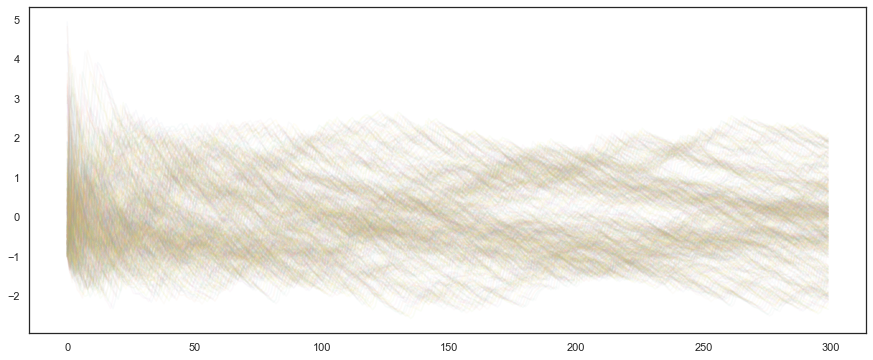

In [160]:
plt.figure(figsize=(15, 6))
for j in range(samples_count):
    plt.plot(Z[j], alpha=0.05)


Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$, которую тоже постройте на том же графике? Не забудьте сделать легенду (подписи на графиках, см. семинар и туториалы).

Из графика видно, что в соотвествии с ЦПТ, наше распределение $Z_{J,300}$ похоже на нормальное с параметрами (0,1)

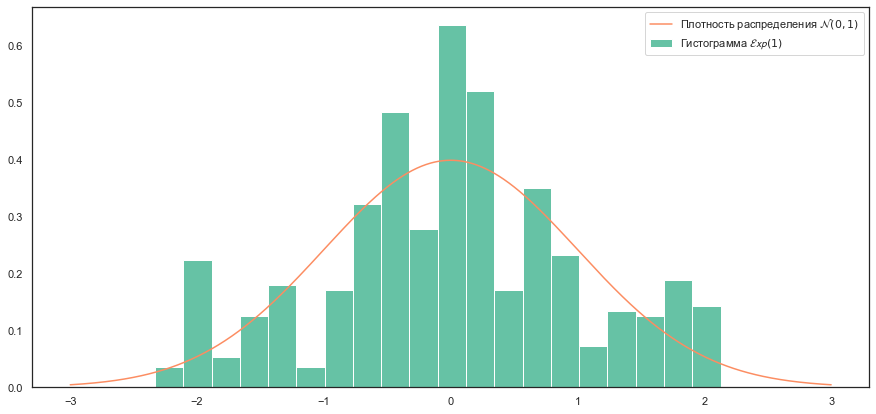

In [161]:
row300=Z[:,299:]
grid1 = np.linspace(-3, 3, 1000)
norm_pdf_values = sps.norm.pdf(grid1)

plt.figure(figsize=(15, 7))
plt.hist(row300, bins=20, density=True, label='Гистограмма $\\mathcal{Exp}(1)$')
plt.plot(grid1, norm_pdf_values, label='Плотность распределения $\\mathcal{N}(0,1)$')
plt.legend();






*b).* Выполните те же действия для распределения $Pois(1)$.


Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

In [163]:
size = 300  
samples_count = 500 

sample = np.array(sps.poisson.rvs(mu=1,size=size*samples_count)) 
sample.reshape((samples_count,size))

array([[0, 0, 1, ..., 2, 2, 1],
       [1, 1, 1, ..., 0, 1, 2],
       [1, 1, 1, ..., 0, 0, 1],
       ...,
       [0, 1, 2, ..., 2, 3, 0],
       [1, 1, 0, ..., 0, 3, 2],
       [2, 1, 0, ..., 1, 1, 0]])

In [164]:
sums =[]
for i in range(samples_count):
    for j in range(size):
        sums.append(np.sum(sample[i:][:j+1]))
sums=np.array(sums)
sums=sums.reshape((samples_count,size))

In [165]:
mean = sums.mean(axis=0)
div=sums.std(axis=0)

In [166]:
Z=[]
for i in range(samples_count):
    for j in range(size):  
        a=(sums[i][j]-mean[j])/(div[j])
        Z.append(a)
Z=np.array(Z)
Z=Z.reshape((500,300))

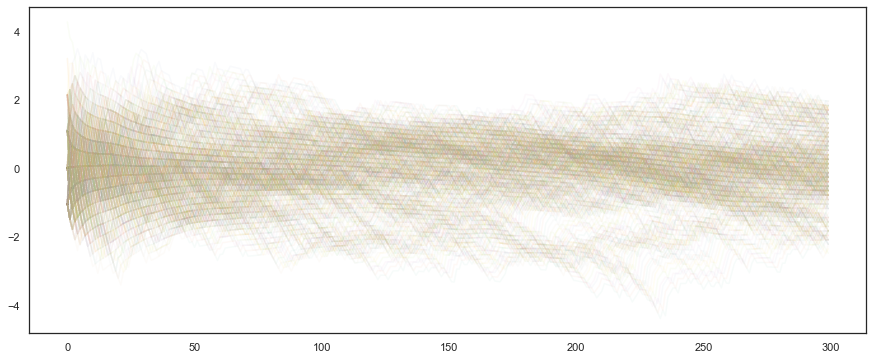

In [167]:
plt.figure(figsize=(15, 6))
for j in range(samples_count):
    plt.plot(Z[j], alpha=0.05)

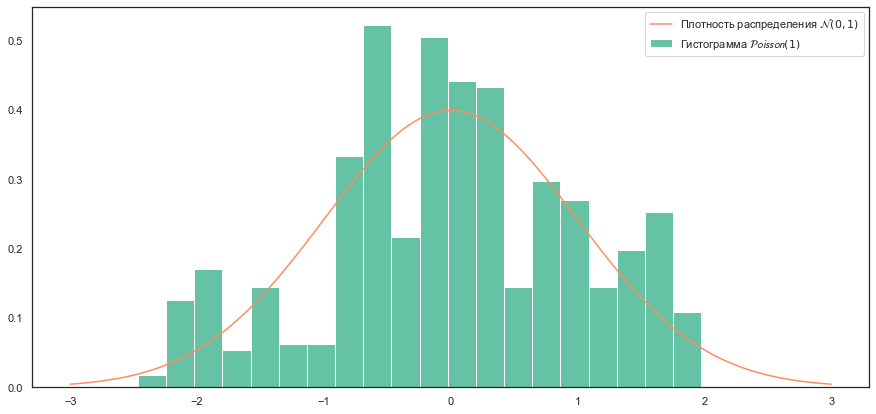

In [168]:
row300=Z[:,299:]
grid1 = np.linspace(-3, 3, 1000)
norm_pdf_values = sps.norm.pdf(grid1)

plt.figure(figsize=(15, 7))
plt.hist(row300, bins=20, density=True, label='Гистограмма $\\mathcal{Poisson}(1)$')
plt.plot(grid1, norm_pdf_values, label='Плотность распределения $\\mathcal{N}(0,1)$')
plt.legend();

### Вывод о задаче
Смысл ЦПТ состоит в том, что сумма (достаточно)большого числа независимых одинаково распределенных случайных величин имеет распределение, похожее на нормальное. Наш эксперимент демонстрирует, что это действительно так(вне зависимости от исходной случайно величины).